In [2]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
tf.set_random_seed(777)

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [7]:
# input plaeholders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [8]:
# weights & bias for nn layers
W1 = tf.get_variable('W1', shape = [784, 256], 
                      initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable('W2', shape = [256, 256], 
                     initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable('W3', shape = [256, 10], 
                     initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
# train my model
for epoch in range(training_epochs) :
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch) :
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X : batch_xs, Y : batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch : ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

Epoch :  0001 cost =  0.301037500
Epoch :  0002 cost =  0.113906383
Epoch :  0003 cost =  0.073367373
Epoch :  0004 cost =  0.052756533
Epoch :  0005 cost =  0.037921720
Epoch :  0006 cost =  0.029096069
Epoch :  0007 cost =  0.024938375
Epoch :  0008 cost =  0.019829117
Epoch :  0009 cost =  0.013791098
Epoch :  0010 cost =  0.015786075
Epoch :  0011 cost =  0.012873604
Epoch :  0012 cost =  0.010586153
Epoch :  0013 cost =  0.011872091
Epoch :  0014 cost =  0.009238174
Epoch :  0015 cost =  0.010186014
Learning Finished!


In [13]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy : ', sess.run(accuracy, 
                              feed_dict = {X : mnist.test.images, Y : mnist.test.labels}))

Accuracy :  0.9775


In [14]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples-1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Label:  [4]
Prediction:  [4]


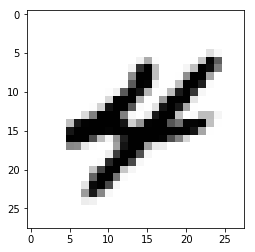

In [15]:
plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()